In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time 
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [55]:
## 카카오 맵 
driver = webdriver.Chrome()
driver.get('https://map.kakao.com/')

In [56]:
searchbox = driver.find_element(By.ID, 'search.keyword.query')
searchbox.send_keys('홍대 맛집'+ Keys.ENTER)

In [57]:
## 상세보기 주소 가져오기 
list_url = []
moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
for i in range(len(moreview_element)):
    list_url.append(moreview_element[i].get_attribute('href'))

driver.close()

In [96]:
list_url

['https://place.map.kakao.com/26235884',
 'https://place.map.kakao.com/53292857',
 'https://place.map.kakao.com/12771116',
 'https://place.map.kakao.com/400281849',
 'https://place.map.kakao.com/892514586',
 'https://place.map.kakao.com/2057792795',
 'https://place.map.kakao.com/19032013',
 'https://place.map.kakao.com/18257217',
 'https://place.map.kakao.com/1985225055',
 'https://place.map.kakao.com/27272711',
 'https://place.map.kakao.com/895272833',
 'https://place.map.kakao.com/10368349',
 'https://place.map.kakao.com/8123221',
 'https://place.map.kakao.com/21410206',
 'https://place.map.kakao.com/268235810']

In [109]:
data = {
    'name' : [],
    'category' : [],
    'star' : [],
    'address' : [],
    'oper_time' : [],
    'starCount' : [],
    'reviewCount' : []
}


In [110]:
for i in range(len(list_url)):
    ## 상세보기 웹페이지 열기
    driver = webdriver.Chrome()
    driver.get(list_url[i])
    driver.implicitly_wait(3)

    # 영업시간 더 보기 클릭
    try:
        oper_more = driver.find_elements(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
        oper_more[0].clcik()
        time.sleep(2)

         ## 상세page bs4 파싱 분석
        soup = bs(driver.page_source, 'html.parser')

    # 영업시간 더보기가 없는 경우
    except:
        ## 상세page bs4 파싱 분석
        soup = bs(driver.page_source, 'html.parser')

    # 웹페이지 닫기
    driver.close()
    
    # 매장명
    data['name'].append(soup.find('h2', {'class':'tit_location'}).get_text())
    # 분류
    data['category'].append(soup.find('span',{'class':'txt_location'}).get_text().split(':')[1].strip())
    # 주소
    data['address'].append(soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " "))

    # 별점 없는 경우 구분 (별점, 리뷰 수)
    if len(soup.find_all('span',{'class':'color_b'})) > 1:
        data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
        data['starCount'].append(soup.find('a', {'class': 'link_evaluation'})['data-cnt'])
        data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
    else:
        data['star'].append('0')
        data['starCount'].append('0')
        data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

    # 영업시간 더보기 없는 경우 구분
    if oper_more:    
        data['oper_time'].append(soup.find_all('ul', {'class':'list_operation'})[1].get_text().strip())
    else:
        data['oper_time'].append(soup.find('ul', {'class':'list_operation'}).get_text().strip().replace("\n", ""))

    print(f"{i+1}번째 데이터 입력 완료")


1번째 데이터 입력 완료
2번째 데이터 입력 완료
3번째 데이터 입력 완료
4번째 데이터 입력 완료
5번째 데이터 입력 완료
6번째 데이터 입력 완료
7번째 데이터 입력 완료
8번째 데이터 입력 완료
9번째 데이터 입력 완료
10번째 데이터 입력 완료
11번째 데이터 입력 완료
12번째 데이터 입력 완료
13번째 데이터 입력 완료
14번째 데이터 입력 완료
15번째 데이터 입력 완료


In [111]:
df = pd.DataFrame(data)

In [112]:
df

,name,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,191,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",134,804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,277,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,149,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,23,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",498,118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,194,120


In [74]:
data['oper_time']

['매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30',
 '월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30',
 '매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00',
 'app.catchtable.co.kr/ct/shop/woowaa_hongdae',
 '월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 휴게시간 16:00 ~ 17:00',
 '매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n일 휴게시간 15:30 ~ 17:00']

In [26]:
len(data['oper_time'])

15

In [27]:
data['oper_time']

['매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30',
 '월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30',
 '매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00',
 '매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00',
 '월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 휴게시간 16:00 ~ 17:00',
 '매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n일 휴게시간 15:30 ~ 17:00',
 '매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00',
 '매일 11:00 ~ 22:00',
 '월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00',
 '매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00',
 '화~일 11:30 ~ 20:00\n\n화~금 휴게시간 15:00 ~ 16:00',
 '매일 12:00 ~ 21:00',
 '매일 11:00 ~ 23:00\n\n매일 라스트오더 ~ 22:00',
 '매일 11:30 ~ 03:00',
 '매일 11:30 ~ 21:30']

In [22]:
data['star']

['3.8',
 '4.1',
 '4.2',
 '3.4',
 '3.5',
 '4.3',
 '3.6',
 '3.8',
 '4.7',
 '4.4',
 '271개',
 '0',
 '4.2',
 '3.9',
 '3.0',
 '4.5']

In [2]:
driver = webdriver.Chrome()
driver.get('https://place.map.kakao.com/19032013')

In [81]:
# 영업시간 더 보기 클릭
try:
    oper_more = driver.find_element(By.CSS_SELECTOR, 'a[data-logevent = "main_info,more_timeinfo"]')
    oper_more.clcik()
    time.sleep(2)
         ## 상세page bs4 파싱 분석
    soup = bs(driver.page_source, 'html.parser')
# 영업시간 더보기가 없는 경우
except:
    ## 상세page bs4 파싱 분석
    soup = bs(driver.page_source, 'html.parser')

In [91]:
soup.find('span', {'class': 'txt_address'}).get_text().replace(" ", "").replace("\n", " ")

'서울마포구 독막로68 2층(우)04074'

In [94]:
test = pd.read_csv('./data.csv')

In [95]:
test

,name,category,star,address,oper_time,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,120


In [ ]:
    # 별점 없는 경우 구분 (별점, 리뷰 수)
if len(soup.find_all('span',{'class':'color_b'})) > 1:
    data['star'].append(soup.find_all('span', {'class':'color_b'})[0].get_text().strip('점'))
    data['starCount'].append(soup.find('span', {'class':'color_g'}).get_text().strip('(').strip(')'))
    data['reviewCount'].append(soup.find_all('span', {'class':'color_b'})[1].get_text().strip('개'))
else:
    data['star'].append('0')
    data['starCount'].append('0')
    data['reviewCount'].append(soup.find('span', {'class':'color_b'}).get_text().strip('개'))

In [107]:
soup.find('span', {'class':'color_g'}).get_text().strip('개 후기').strip('(').strip(')')

'921'

In [108]:
soup.find('a', {'class': 'link_evaluation'})['data-cnt']

'921'

In [138]:
## 카카오 맵 
driver = webdriver.Chrome()
driver.get('https://map.kakao.com/')
time.sleep(2)

## input 창에 검색어 입력
searchbox = driver.find_element(By.ID, 'search.keyword.query')
searchbox.send_keys('홍대 맛집'+ Keys.ENTER)
time.sleep(3)



In [123]:
driver.find_element(By.ID, 'info.search.place.more').click()

In [125]:
driver.find_element(By.ID, f'info.search.page.no{4}').click()

In [141]:
## 상세보기 주소 가져오기 
list_url = []

for inx in range(2,12):
    moreview_element = driver.find_elements(By.CSS_SELECTOR, 'a[data-id="moreview"]')
    for i in range(len(moreview_element)):
        list_url.append(moreview_element[i].get_attribute('href'))
    if inx == 2:
        driver.find_element(By.ID, 'info.search.place.more').click()
        time.sleep(1)
    elif inx in (6,11):
        driver.find_element(By.ID, 'info.search.page.next').click()
        time.sleep(1)  
    else:
        if (inx - 5) <= 0:
            driver.find_element(By.ID, f'info.search.page.no{inx}').click()
            time.sleep(1)
        else:
            driver.find_element(By.ID, f'info.search.page.no{inx-5}').click()
            time.sleep(1)


In [142]:
len(list_url)

150

In [143]:
test = pd.read_csv('./data.csv')

In [144]:
test

,name,category,star,address,oper_time,starCount,reviewCount
0,피오니 홍대점,카페,3.8,서울마포구 독막로7길51 1층(우)04043,매일 12:00 ~ 21:00\n\n매일 라스트오더 ~ 20:30,274,642
1,943킹스크로스,테마카페,4.1,"서울마포구 양화로16길24 지하1층,1~4층(우)04039",월~목 11:30 ~ 21:30\n\n금~일 10:00 ~ 21:30,360,191
2,카미야,"돈까스,우동",4.2,서울마포구 와우산로21길28-6 지하1층(우)04040,매일 11:00 ~ 21:30\n\n매일 라스트오더 ~ 21:00,191,424
3,우와 홍대본점,일식,3.4,서울마포구 와우산로21길21-16 2층202호(우)04041,매일 12:00 ~ 22:00월~금 휴게시간 14:30 ~ 17:00,168,622
4,감성타코 홍대점,"멕시칸,브라질",3.5,서울마포구 와우산로21길20-11 2층(우)04040,"월~금 11:30 ~ 22:00\n\n토,일 12:00 ~ 22:00\n\n월~금 ...",134,804
5,칸다소바 홍대점,일본식라면,4.3,서울마포구 와우산로51-6 1층(우)04049,매일 10:30 ~ 21:30\n\n월~토 휴게시간 16:00 ~ 17:00\n\n...,277,439
6,맛이차이나,중국요리,3.6,서울마포구 독막로68 2층(우)04074,매일 11:30 ~ 22:00월~금 휴게시간 16:00 ~ 17:00,149,178
7,강강술래 홍대점,한식,3.8,"서울마포구 잔다리로6길25 1,2층(우)04039",매일 11:00 ~ 22:00,23,30
8,홍대 조선시대,한식,4.7,서울마포구 홍익로3길44 지하1층(우)04039,"월,화,수,목,일 17:30 ~ 03:00\n\n금,토 17:30 ~ 04:00",498,118
9,비스트로주라,양식,4.4,서울마포구 와우산로23길18-7 1층(우)04054,매일 11:30 ~ 21:00월~금 휴게시간 15:10 ~ 17:00,194,120


In [5]:
import base64
import re

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [20]:
img_element = driver.find_element(By.ID, 'dayChart')



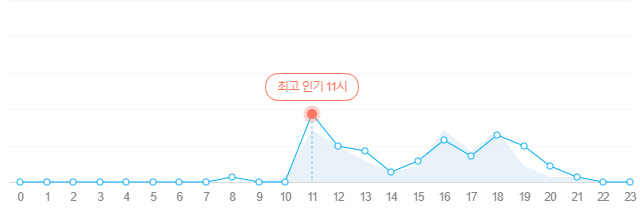

In [7]:
## canvas 파일 스크래핑

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "ageChart")))
base64_image = driver.execute_script("return document.querySelector('canvas').toDataURL('image/png');")
print(base64_image)

In [18]:
import requests

In [17]:
def image_save(img_path, save_path, file_name):
    html_data = requests.get(img_path)
    imageFile = open(
        os.path.join(
            save_path,
            file_name
        ),
        'wb'
    )
    # 이미지 데이터의 크기
    chunk_size = 100000000
    for chunk in html_data.iter_content(chunk_size):
        imageFile.write(chunk)
        imageFile.close()
    print('파일 저장 완료')